In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [2]:
# 创建一个实例
TSNE_model = TSNE(n_components=2, perplexity=3.0, learning_rate='auto',
                  n_iter=1000, init='pca', random_state=None)

In [3]:
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])

TSNE_transformed_data = TSNE_model.fit_transform(X)

In [4]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
image_data = mnist['data'][0:10000]
labels = mnist['target'][0:10000]

print("Data shape:", image_data.shape)
print("Data type:", type(image_data))
print()
print("Label shape:", labels.shape)
print("Label type:", type(labels))

/Users/tomato/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data shape: (10000, 784)
Data type: <class 'pandas.core.frame.DataFrame'>

Label shape: (10000,)
Label type: <class 'pandas.core.series.Series'>


In [5]:
# 规则化像素值
image_data = image_data.astype('float32') / 255

In [6]:
PCA_model = PCA(n_components=2)
PCA_transformed_data = PCA_model.fit_transform(image_data)

print("PCA transformed data shape:", PCA_transformed_data.shape)
print("PCA transformed data type:", type(PCA_transformed_data))

PCA transformed data shape: (10000, 2)
PCA transformed data type: <class 'numpy.ndarray'>


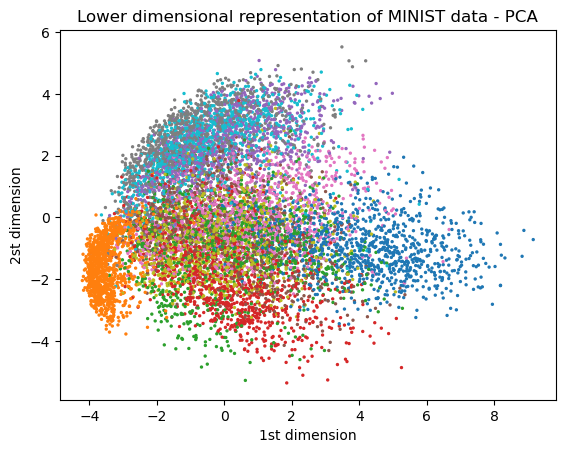

In [7]:
plt.scatter(PCA_transformed_data[:,0],
            PCA_transformed_data[:,1],
            c=[int(i) for i in labels.values],s=2, cmap='tab10')

plt.xlabel('1st dimension')
plt.ylabel('2st dimension')
plt.title('Lower dimensional representation of MINIST data - PCA');

In [8]:
TSNE_model = TSNE(n_components=2, perplexity=30.0)
TSNE_transformed_data = TSNE_model.fit_transform(image_data)

print("TSNE transformed data shape:", TSNE_transformed_data.shape)
print("TSNE transformed data type:", type(TSNE_transformed_data))

TSNE transformed data shape: (10000, 2)
TSNE transformed data type: <class 'numpy.ndarray'>


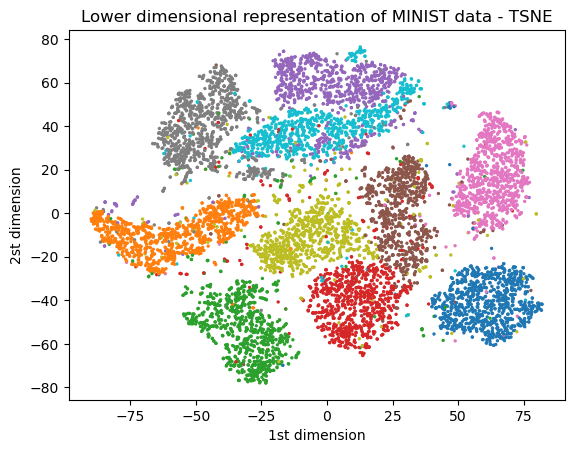

In [9]:
plt.scatter(TSNE_transformed_data[:,0],
            TSNE_transformed_data[:,1],
            c=[int(i) for i in labels.values], s=2, cmap='tab10')

plt.xlabel('1st dimension')
plt.ylabel('2st dimension')
plt.title('Lower dimensional representation of MINIST data - TSNE');

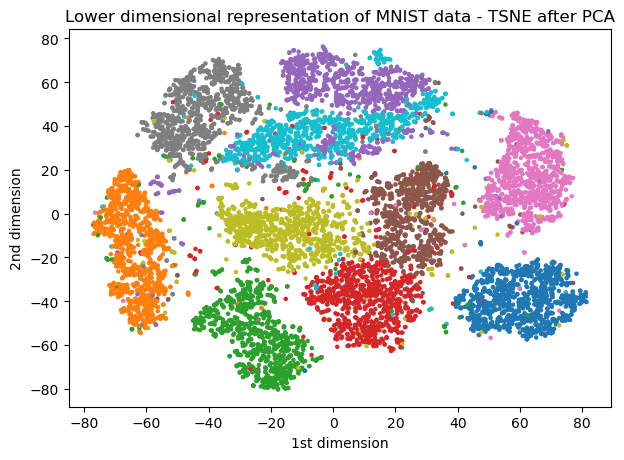

In [10]:
PCA_model = PCA(n_components=100)
PCA_transformed_data = PCA_model.fit_transform(image_data)

TSNE_model = TSNE(n_components=2, perplexity=30.0)
PCA_TSNE_transformed_data = TSNE_model.fit_transform(PCA_transformed_data)

plt.figure(figsize=[7, 4.9])

plt.scatter(PCA_TSNE_transformed_data[:, 0], PCA_TSNE_transformed_data[:, 1], 
            c=np.array(labels).astype('int32'), s=5, cmap='tab10')

plt.title('Lower dimensional representation of MNIST data - TSNE after PCA')
plt.xlabel('1st dimension')
plt.ylabel('2nd dimension');

Text(0, 0.5, 'Explained variance')

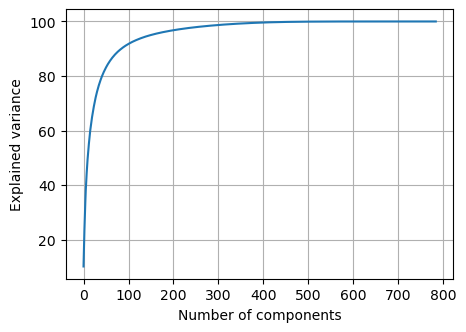

In [11]:
pca_all = PCA(n_components=784)
pca_all.fit(image_data)

plt.figure(figsize=[5, 3.5])
plt.grid()
plt.plot(np.cumsum(pca_all.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [ ]:
perplexity_vals = np.arange(10, 220, 10)
KL_divergences = []

for i in perplexity_vals:
    TSNE_model = TSNE(n_components=2, perplexity=i, n_iter=500).fit(PCA_transformed_data)
    KL_divergences.append(TSNE_model.kl_divergence_)

plt.style.use("ggplot") 
plt.figure(figsize=[5, 3.5])
plt.plot(perplexity_vals, KL_divergences, marker='o', color='blue')
plt.xlabel("Perplexity values")
plt.ylabel("KL divergence")

# 耗时较长

6it [04:07, 41.22s/it]


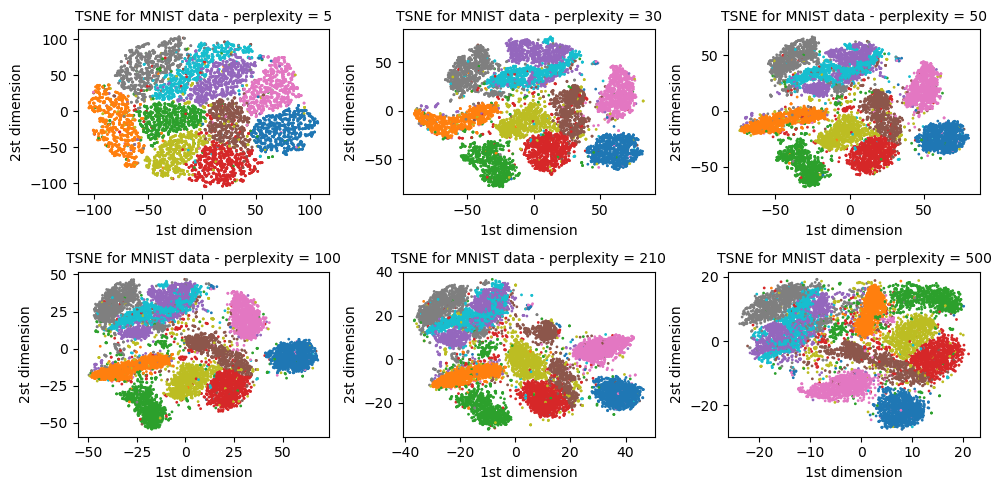

In [13]:
from tqdm import tqdm

perplexity_n = [5, 30, 50, 100, 210, 500]

fig,axes = plt.subplots(2,3,figsize=(10,5))
axes = axes.flatten() 

for i,v in tqdm(enumerate(perplexity_n)):
    TSNE_model = TSNE(n_components=2, perplexity=v)
    TSNE_transformed_data = TSNE_model.fit_transform(image_data)
    
    axes[i].scatter(TSNE_transformed_data[:,0],
                TSNE_transformed_data[:,1],
                c=[int(i) for i in labels.values], s=1, cmap='tab10')

    axes[i].set_xlabel('1st dimension')
    axes[i].set_ylabel('2st dimension')
    axes[i].set_title(f'TSNE for MNIST data - perplexity = {v}',fontsize=10)
    
plt.tight_layout();

In [14]:
TSNE_model = TSNE(n_components=2, perplexity=30.0, n_iter=250)

In [15]:
TSNE_model = TSNE(n_components=2, perplexity=30.0, init='pca')

# 或者
# TSNE_model = TSNE(n_components=2, perplexity=30.0) # default

In [16]:
TSNE_model = TSNE(n_components=2, perplexity=30.0, init='random',
                  random_state=42)

In [17]:
TSNE_model = TSNE(n_components=2, perplexity=30.0, init='random',
                  random_state=0)